In [12]:
# To write a Python 2/3 compatible codebase, the first step is to add this line to the top of each module
from __future__ import division, print_function, unicode_literals

######################################### Imports #########################################
# Numpy is the fundamental package for scientific computing with Python. 
# SciPy (pronounced "Sigh Pie") is an open source Python library used for scientific computing and technical computing. 
# Os module provides a portable way of using operating system dependent functionality.
import numpy as np # np is an alias pointing to numpy
import scipy as sp # sp is an alias pointing to scipy
import pandas as pd # pd is an alias point to pandas

from sklearn import metrics, tree
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
# If you don't have graphviz package, you need to install it https://anaconda.org/anaconda/graphviz
# How to install Graphviz with Anaconda 1
# conda install -c anaconda graphviz 
from IPython.display import Image
import matplotlib.pyplot as plt
!pip install graphviz
import itertools
import graphviz
import os

# Seed the generator to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt #pyplot is matplotlib's plotting framework https://matplotlib.org/users/pyplot_tutorial.html
# Dynamically change the default rc settings in a python script
# See documentation for a complete list of parameters https://matplotlib.org/users/customizing.html
plt.rcParams['axes.labelsize'] = 14  # fontsize of the x any y labels
plt.rcParams['xtick.labelsize'] = 12 # fontsize of the tick labels
plt.rcParams['ytick.labelsize'] = 12 # fontsize of the tick labels

# Where to save the figures
PROJECT_ROOT_DIR = "C:\\Users\\carlj\\OneDrive\\Documents\\School-MSBA\\Classes\\Fall\\Intro. to Business Analytics\\HW1"
CHAPTER_ID = "decision_trees"

# Checking my file directory
#%pwd 

########################################### Imports ###########################################
hw1data = pd.read_csv("HW1_Data.csv") 

In [13]:
#Looking at how big our dataset is
hw1data.shape

(31891, 12)

In [14]:
#taking a peek at how the data looks like
hw1data.head()

,revenue,outcalls,incalls,months,eqpdays,webcap,marryyes,travel,pcown,creditcd,retcalls,churndep
0,83.53,20.00,1.0,31,745,1,0,0,0,0,4,1
1,29.99,0.00,0.0,52,1441,0,0,0,1,1,3,1
2,37.75,2.67,0.0,25,572,0,0,0,1,1,3,1
3,5.25,0.00,0.0,45,1354,0,0,0,0,0,2,1
4,42.71,8.67,0.0,27,224,1,0,0,0,0,3,1


In [15]:
#looking at any potential problems/outliers
hw1data.describe()

,revenue,outcalls,incalls,months,eqpdays,webcap,marryyes,travel,pcown,creditcd,retcalls,churndep
count,31891.000000,31891.000000,31891.000000,31891.000000,31891.000000,31891.000000,31891.000000,31891.000000,31891.000000,31891.000000,31891.000000,31891.000000
mean,58.665179,24.951385,8.065277,18.761908,391.222633,0.894704,0.363175,0.057163,0.184817,0.676931,0.044088,0.497162
std,44.163859,34.790147,16.610589,9.548019,254.998478,0.306939,0.480922,0.232158,0.388155,0.467656,0.224552,0.500000
min,-5.860000,0.000000,0.000000,6.000000,-5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.450000,3.000000,0.000000,11.000000,212.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,48.380000,13.330000,2.000000,17.000000,341.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,71.040000,33.330000,9.000000,24.000000,530.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,861.110000,610.330000,404.000000,60.000000,1812.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [16]:
#data cleaning
baddata = hw1data[(hw1data['revenue']<0) | (hw1data['eqpdays']<0)].index

hw1data.drop(baddata, inplace=True)

In [17]:
from sklearn.tree import DecisionTreeClassifier # The sklearn.tree module includes decision tree-based models for 
# classification and regression
# Documentation for decision Tree Classifier 
# http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

# Seaborn is a Python data visualization library based on matplotlib. 
# Seaborn documentation can be found here https://seaborn.pydata.org/generated/seaborn.set.html
import seaborn as sns # sns is an alias pointing to seaborn
sns.set(color_codes=True) #Set aesthetic parameters in one step. Remaps the shorthand color codes (e.g. “b”, “g”, “r”, etc.) to the colors from this palette.
from scipy import stats #Documentation stats package of scipy https://docs.scipy.org/doc/scipy/reference/stats.html#module-scipy.stats

######################################### Isolating the Target Variable #########################################
# Retrieving Attributes
X = hw1data.iloc[:,:-1]
# Retriving Target Variable
y = hw1data.iloc[:,-1]

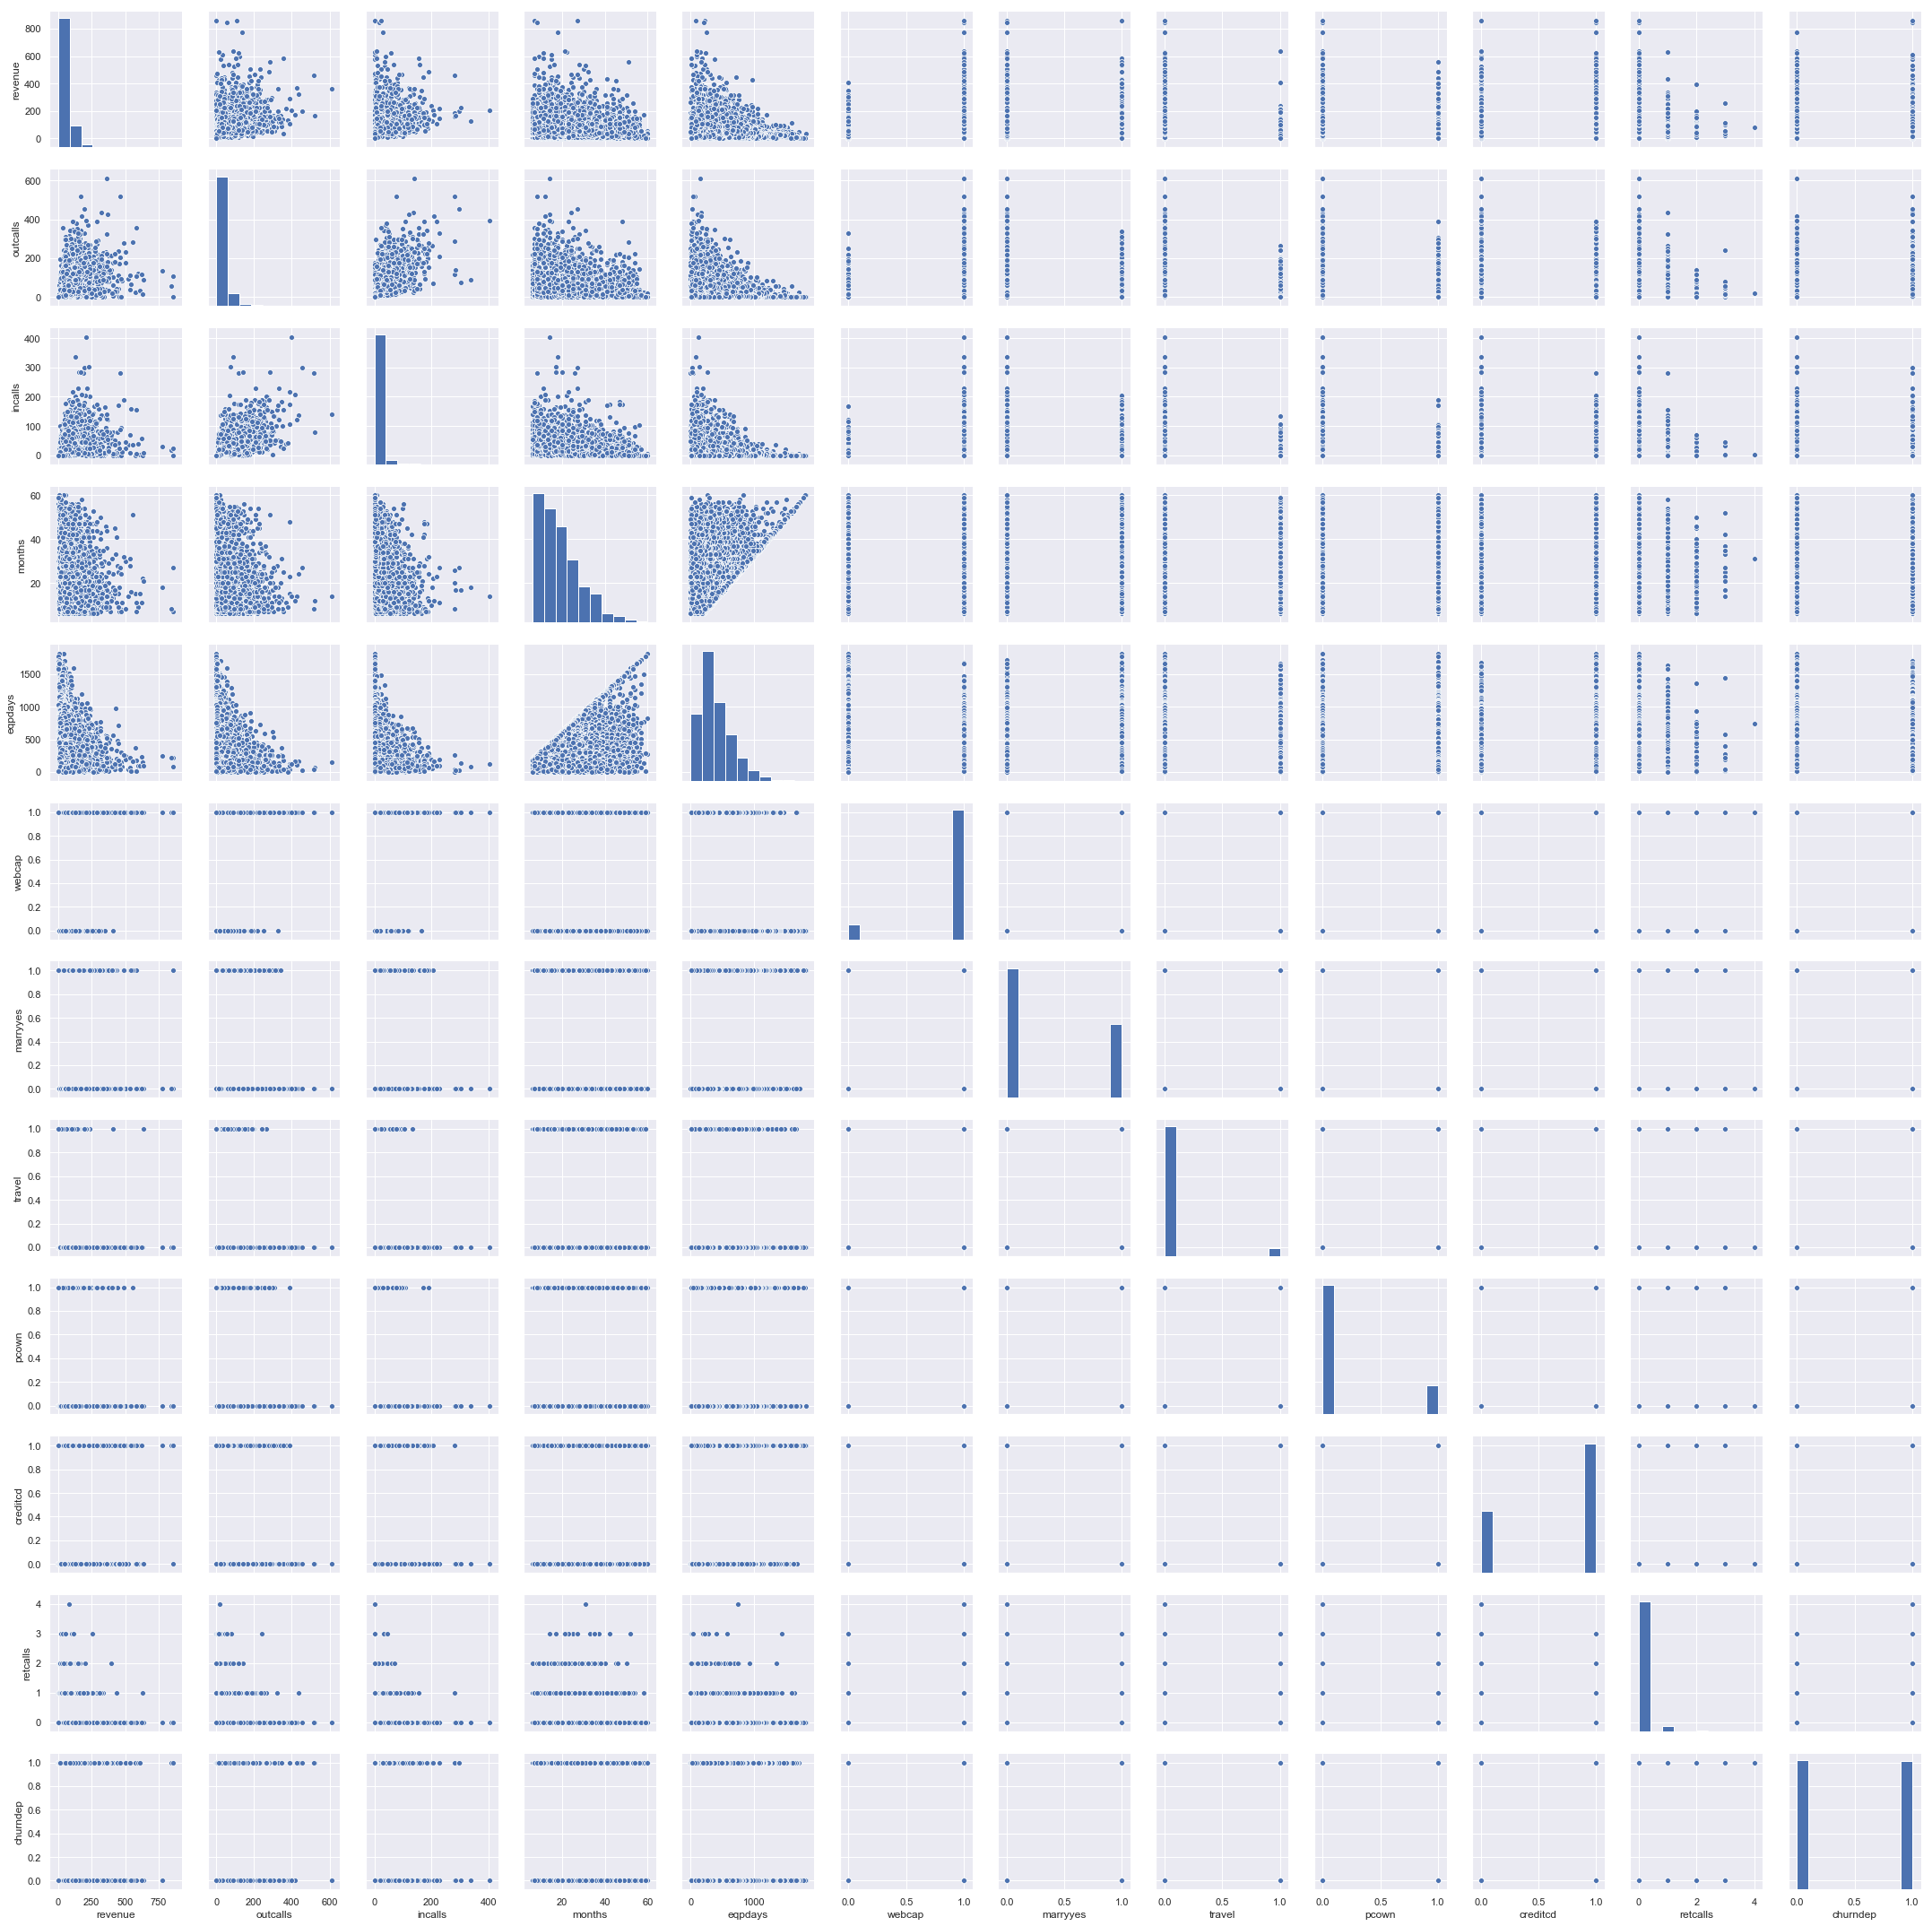

In [7]:
sns.pairplot(hw1data)

In [18]:
###################################### Split the Data ######################################

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
# Note: Always a good idea to shuffle the dataset before you split it into training and testing
# train_test_split performs shuffling by default

In [19]:
######################################### Model Training #########################################
############################# Build Model & Apply it to the Test Set #######################
#Build the decision tree
clf3 = DecisionTreeClassifier(criterion ='entropy', random_state= 42,max_depth = None, min_samples_split=0.081, min_impurity_decrease=0.002) # Be aware of default parameters
# "clf3.fit(X_train, y_train)"" fits the model and then
# ".predict(X_test)" makes predicitions based on the test set
y_pred = clf3.fit(X_train, y_train).predict(X_test)

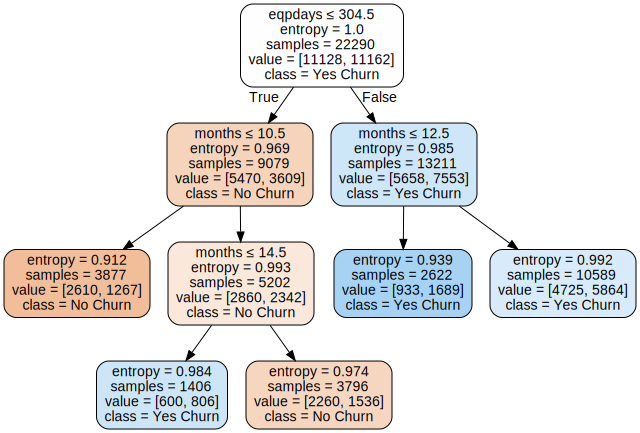

In [20]:
################################# Visualization of Decision Tree ##########################
banana = tree.export_graphviz( clf3,
        out_file=None, #image_path("HW1.dot")
        feature_names=list(X.columns),
        class_names=["No Churn","Yes Churn"],
        rounded=True,
        filled=True,
        special_characters=True)

graph = graphviz.Source(banana) 
graph


In [21]:
###################################### Confusion Matrix #####################################

# Compute confusion matrix to evaluate the accuracy of a classification    
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

print("Confusion Matrix:")
print(confusion_matrix(y_test,y_pred))
print()
print("Summary Statistics")
print(classification_report(y_test,y_pred))
print()
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))

Confusion Matrix:
[[2123 2755]
 [1132 3544]]

Summary Statistics
              precision    recall  f1-score   support

           0       0.65      0.44      0.52      4878
           1       0.56      0.76      0.65      4676

   micro avg       0.59      0.59      0.59      9554
   macro avg       0.61      0.60      0.58      9554
weighted avg       0.61      0.59      0.58      9554


Accuracy: 0.5931546996022609
